# Import Library

In [1]:
#import library matematika, untuk imputasi mean
import math
#perhitungan matematika
import numpy as np 
#memproses data
import pandas as pd 
#visualisasi data
import matplotlib.pyplot as plt 
#membangun grafik dari library matplotlib+pandas
import seaborn as sns 
%matplotlib inline
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
#import library Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.metrics import confusion_matrix, classification_report 


from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')


Bad key text.latex.preview in file C:\Users\Chandra\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Chandra\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Chandra\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You

# Eksploratori Data

In [2]:
df_train = pd.read_csv("application_train.csv")
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df_train.shape

(307511, 122)

In [4]:
df_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

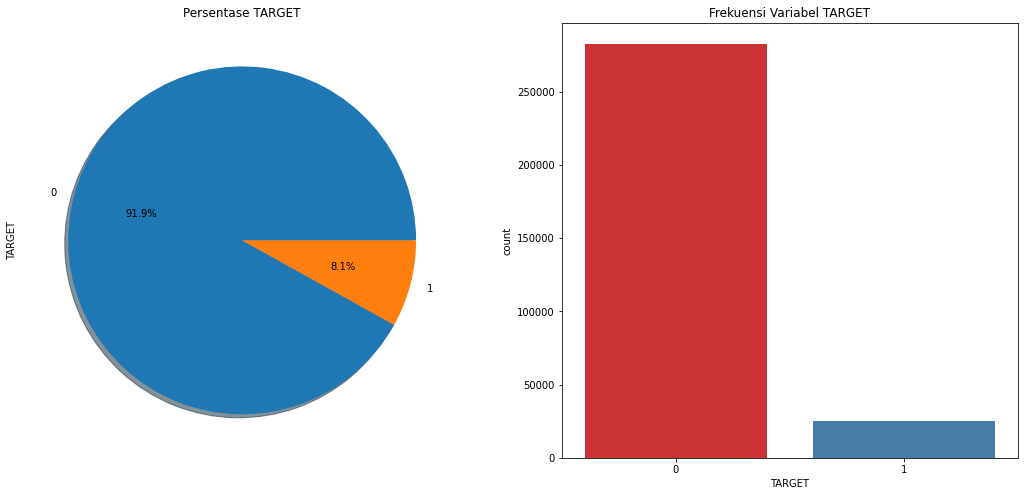

In [58]:
# visualisasi distribusi kelas 

f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0] = df_train['TARGET'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Persentase TARGET')
ax[1] = sns.countplot(x="TARGET", data=df_train, palette="Set1")
ax[1].set_title("Frekuensi Variabel TARGET")
plt.show()

# Preprocessing Data

In [6]:
df_clean = df_train.copy()

In [7]:
df_clean.duplicated().sum()

0

In [8]:
missing_value = pd.DataFrame(df_clean.isnull().sum(), columns=['Missing Values'])
missing_value['Percentage'] = round(((missing_value['Missing Values']/len(df_clean))*100),2)
missing_value

,Missing Values,Percentage
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5


In [9]:

# drop features with of missing values > 40%

df_clean.drop(df_clean.iloc[:, 44:91], inplace=True, axis=1)

In [10]:
#grouping data for imputation

caracter = []
number = []
for col in df_clean.columns: 
  if df_train[col].dtype == 'int64' or df_train[col].dtype == 'float64':
    number.append(col)
  else:
    caracter.append(col)
     

In [11]:
for column in df_clean:
    if df_clean[column].isnull().any():
        if(column in caracter):
            df_clean[column]=df_clean[column].fillna(df_clean[column].mode()[0])
        else:
            df_clean[column]=df_clean[column].fillna(df_clean[column].median())

In [12]:

#check missing values

miss = pd.DataFrame(df_clean.isnull().sum(), columns=['Missing Values'])
miss['Percentage'] = round(((miss['Missing Values']/len(df_clean))*100),2)
miss

,Missing Values,Percentage
SK_ID_CURR,0,0.0
TARGET,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0,0.0
AMT_REQ_CREDIT_BUREAU_MON,0,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0,0.0


In [14]:
df_encoder = df_clean.copy()

In [15]:
df_encoder[['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
     'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
     'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']] = df_encoder[['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                                                                                                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                                                                                        'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']].apply(LabelEncoder().fit_transform)
     

In [16]:
df_encoder.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelling data

In [17]:
correlation_matrix = df_encoder.corr()
correlation_with_target = correlation_matrix['TARGET'].abs().sort_values(ascending=False)

In [18]:
correlation_with_target

TARGET                        1.000000
EXT_SOURCE_2                  0.160295
EXT_SOURCE_3                  0.155892
EXT_SOURCE_1                  0.098887
DAYS_BIRTH                    0.078239
                                ...   
FLAG_MOBIL                    0.000534
FLAG_CONT_MOBILE              0.000370
FLAG_DOCUMENT_5               0.000316
FLAG_DOCUMENT_20              0.000215
AMT_REQ_CREDIT_BUREAU_HOUR    0.000074
Name: TARGET, Length: 75, dtype: float64

In [19]:
relevant_features = correlation_with_target[correlation_with_target > 0.01].index

<AxesSubplot:>

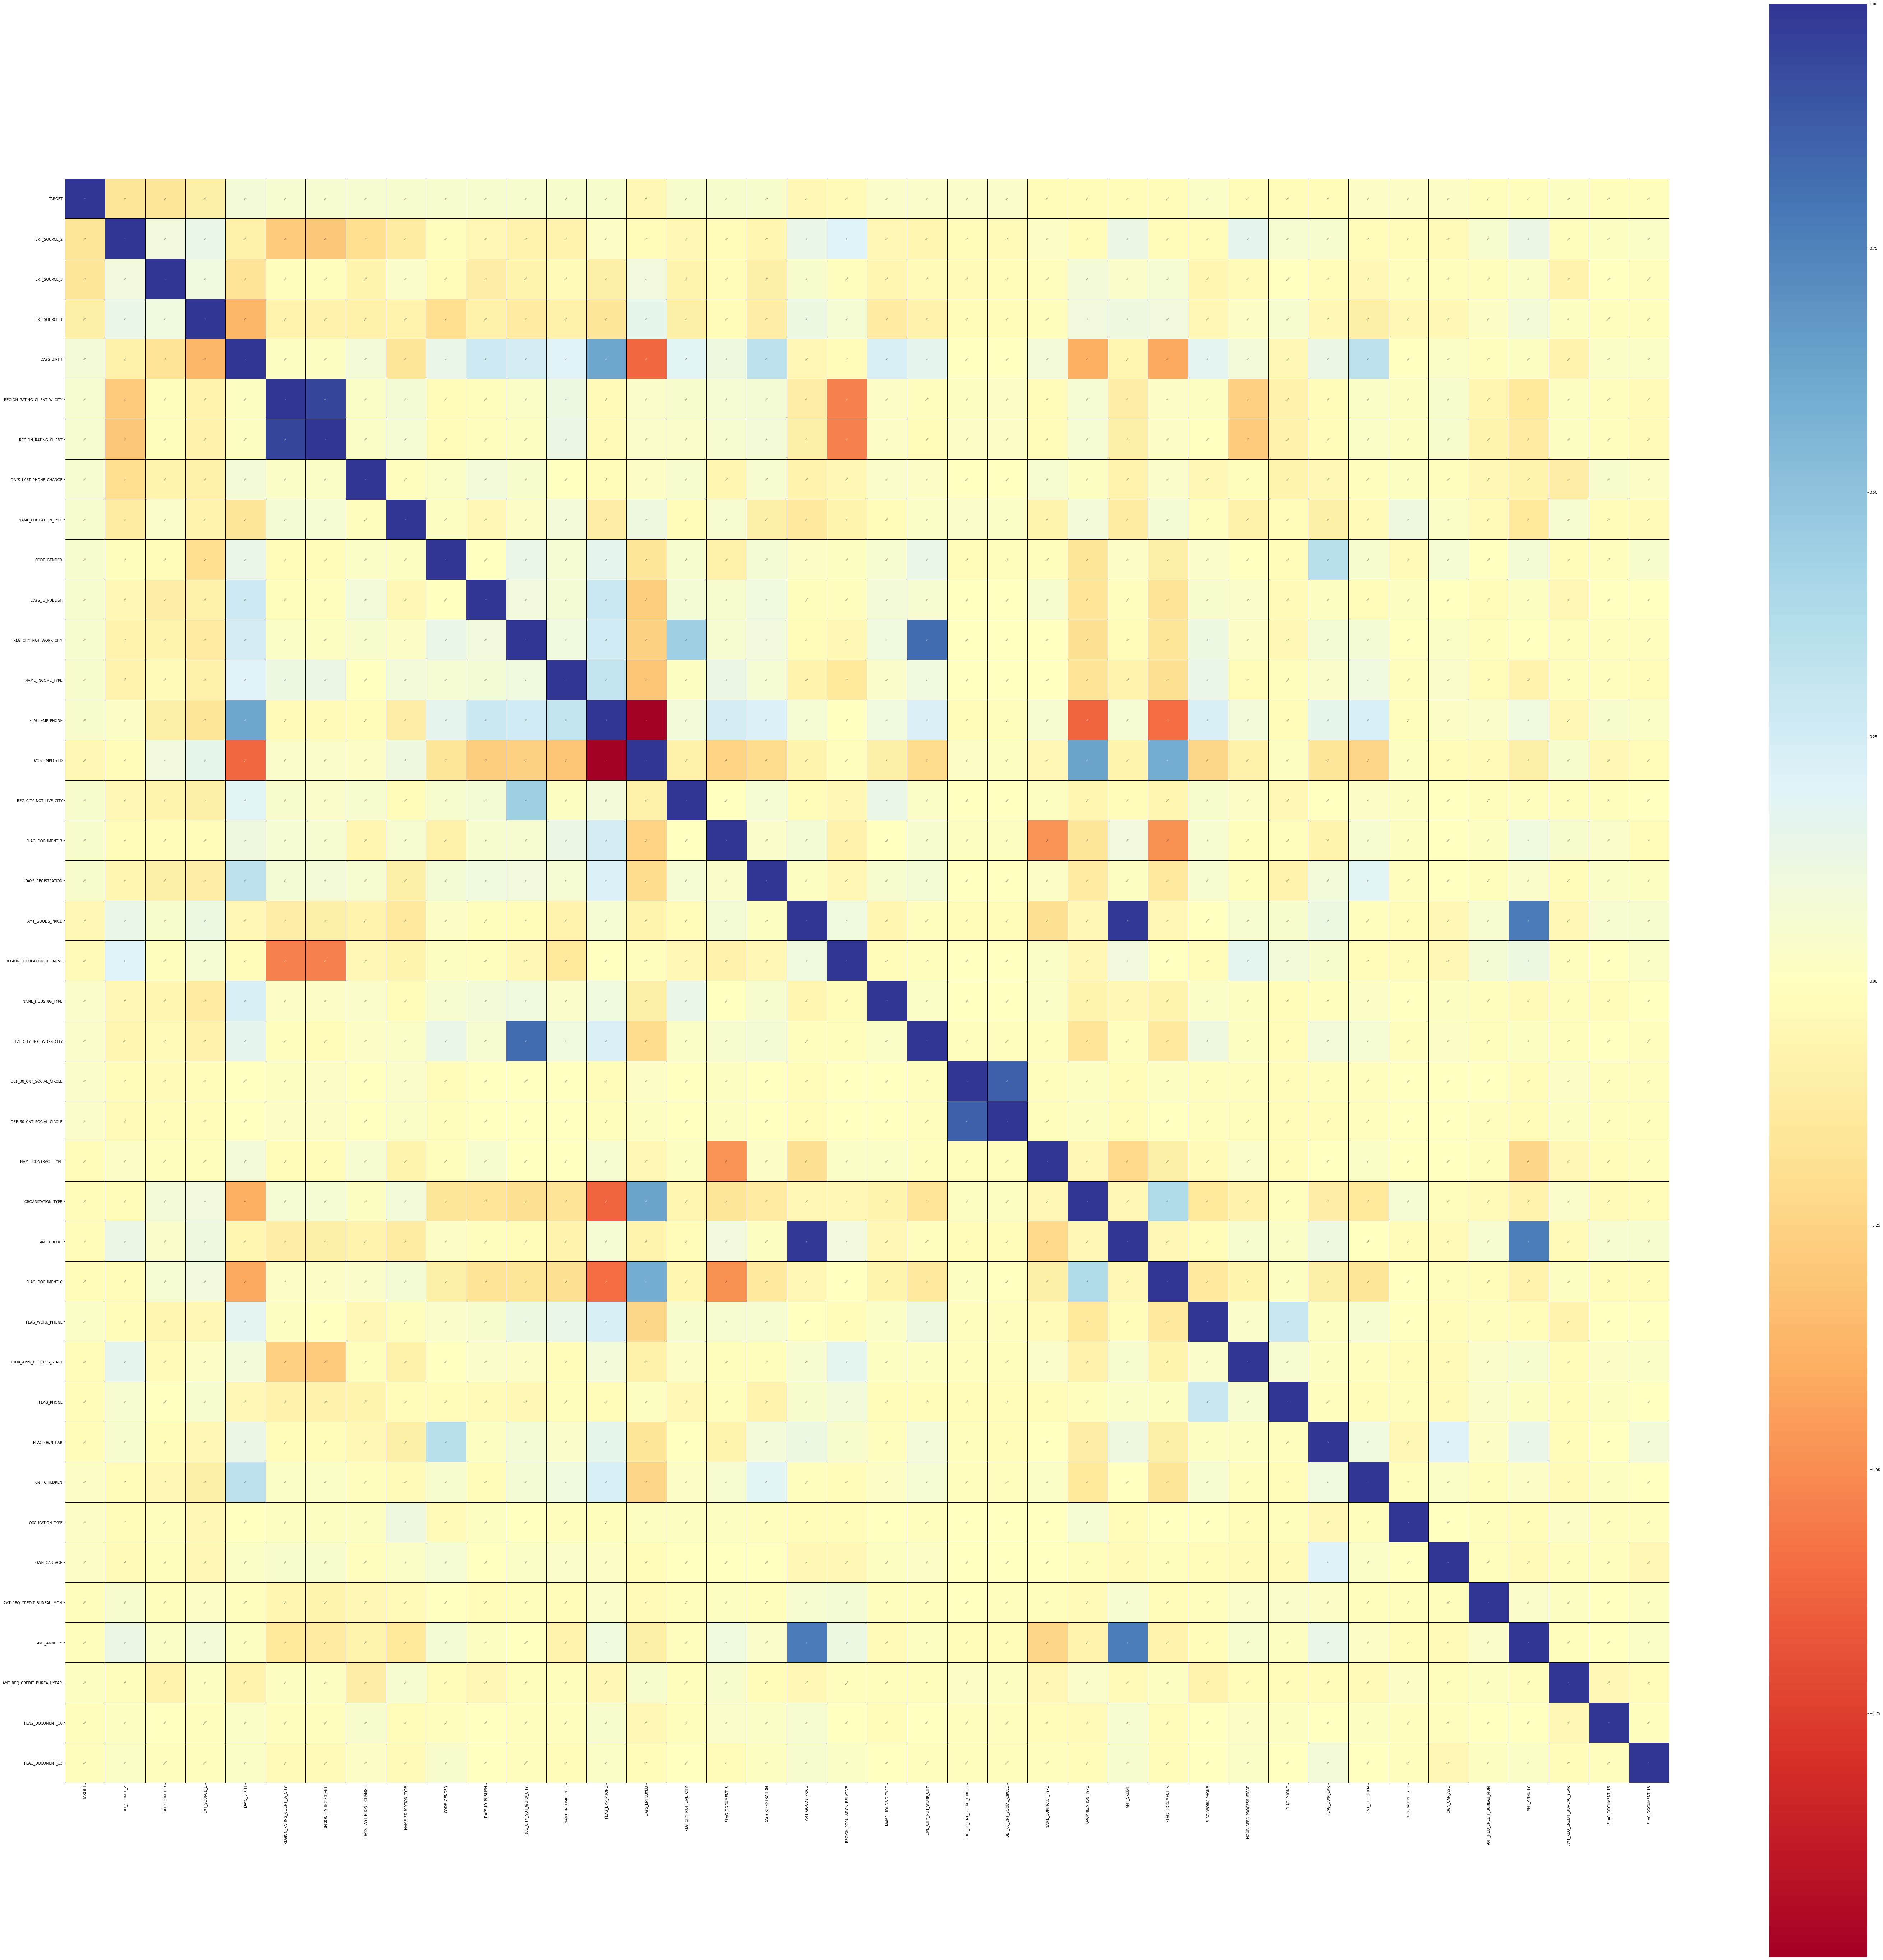

In [20]:
subset_data = df_encoder[relevant_features]
f, ax = plt.subplots(figsize = (100,100))
plt.title = ('Korelasi Atribut')
sns.heatmap(subset_data.corr(),
           annot_kws={"rotation": 45, "fontsize": 3},
           linewidth = 0.7, vmax = 1.0,
           square = True, linecolor = 'black',
           annot = True, cmap = "RdYlBu")

#semakin mendekati 1 semakin berkorelasi


In [21]:
df_encoder.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [22]:
# define x and y features (top 20 features)

X = df_encoder[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                  'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                  'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                  'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                  'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                  'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y= df_encoder['TARGET']

In [23]:
sc = MinMaxScaler()
X_sc = sc.fit_transform(X)

In [24]:
X_sc.shape

(307511, 20)

In [25]:
X_new = SelectKBest(chi2, k=20).fit_transform(X_sc, y)
X_new.shape

(307511, 20)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("Distribusi Data:\n- Train: {} \n- Test: {}".format(len(y_train),len(y_test)))

Distribusi Data:
- Train: 215257 
- Test: 92254


In [27]:
cols = X_train.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

modellog = LogisticRegression()
modellog.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
import timeit
from sklearn.metrics import accuracy_score, precision_score, recall_score
start = timeit.default_timer() # catat waktu mulai
y_predlog = modellog.predict(X_test)
accuracy = round(accuracy_score(y_test,y_predlog), 3)#akurasi sistem
precision = round(precision_score(y_test,y_predlog), 3)#prediksi benar
recall = round(recall_score(y_test,y_predlog), 3)#rasio prediksi benar dari seluruh data
print('A: {} / P: {} / R: {}'.format(accuracy,precision,recall))
stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

A: 0.92 / P: 0.454 / R: 0.006
Lama eksekusi:  0.06463540000000023 detik


In [30]:
df = pd.DataFrame({'Actual' : y_test, 'Predict' : y_predlog})
df

,Actual,Predict
42962,1,0
227307,0,0
290035,0,0
239833,0,0
76427,0,0
...,...,...
254862,0,0
127339,0,0
293474,0,0
10585,0,0


In [31]:
print(classification_report(y_test, y_predlog))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84914
           1       0.45      0.01      0.01      7340

    accuracy                           0.92     92254
   macro avg       0.69      0.50      0.49     92254
weighted avg       0.88      0.92      0.88     92254



<AxesSubplot:>

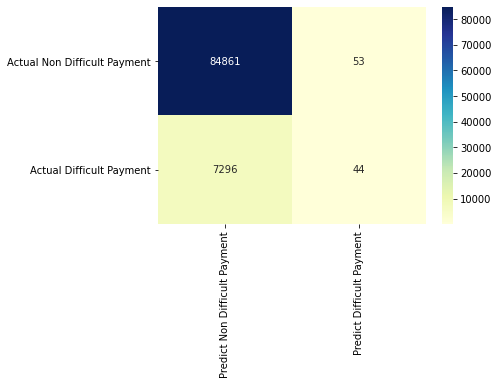

In [32]:
cmtrain = confusion_matrix(y_test, y_predlog)
cm_matrix = pd.DataFrame(data=cmtrain, columns=['Predict Non Difficult Payment', 'Predict Difficult Payment'], 
                                 index=['Actual Non Difficult Payment', 'Actual Difficult Payment'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Random Forest

In [33]:
rf = RandomForestClassifier()

In [34]:
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
import timeit
from sklearn.metrics import accuracy_score, precision_score, recall_score
start = timeit.default_timer() # catat waktu mulai
y_predrf = rf.predict(X_test)
accuracy = round(accuracy_score(y_test,y_predrf), 3)#akurasi sistem
precision = round(precision_score(y_test,y_predrf), 3)#prediksi benar
recall = round(recall_score(y_test,y_predrf), 3)#rasio prediksi benar dari seluruh data
print('A: {} / P: {} / R: {}'.format(accuracy,precision,recall))
stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

A: 0.92 / P: 0.491 / R: 0.007
Lama eksekusi:  4.480591299999986 detik


In [36]:
df = pd.DataFrame({'Actual' : y_test, 'Predict' : y_predrf})
df

,Actual,Predict
42962,1,0
227307,0,0
290035,0,0
239833,0,0
76427,0,0
...,...,...
254862,0,0
127339,0,0
293474,0,0
10585,0,0


In [37]:
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84914
           1       0.49      0.01      0.01      7340

    accuracy                           0.92     92254
   macro avg       0.71      0.50      0.49     92254
weighted avg       0.89      0.92      0.88     92254



<AxesSubplot:>

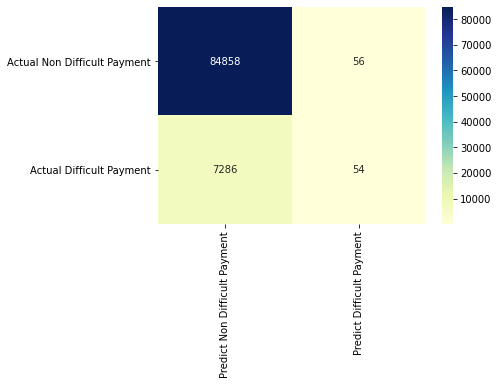

In [38]:
cmtrain = confusion_matrix(y_test, y_predrf)
cm_matrix = pd.DataFrame(data=cmtrain, columns=['Predict Non Difficult Payment', 'Predict Difficult Payment'], 
                                 index=['Actual Non Difficult Payment', 'Actual Difficult Payment'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [40]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
import timeit
from sklearn.metrics import accuracy_score, precision_score, recall_score
start = timeit.default_timer() # catat waktu mulai
y_predgnb = gnb.predict(X_test)
accuracy = round(accuracy_score(y_test,y_predgnb), 3)#akurasi sistem
precision = round(precision_score(y_test,y_predgnb), 3)#prediksi benar
recall = round(recall_score(y_test,y_predgnb), 3)#rasio prediksi benar dari seluruh data
print('A: {} / P: {} / R: {}'.format(accuracy,precision,recall))
stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

A: 0.897 / P: 0.201 / R: 0.098
Lama eksekusi:  0.1339433999999926 detik


In [42]:
print(classification_report(y_test, y_predgnb))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     84914
           1       0.20      0.10      0.13      7340

    accuracy                           0.90     92254
   macro avg       0.56      0.53      0.54     92254
weighted avg       0.87      0.90      0.88     92254



<AxesSubplot:>

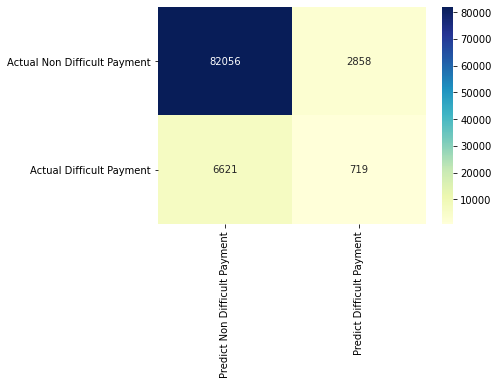

In [43]:
cmtrain = confusion_matrix(y_test, y_predgnb)
cm_matrix = pd.DataFrame(data=cmtrain, columns=['Predict Non Difficult Payment', 'Predict Difficult Payment'], 
                                 index=['Actual Non Difficult Payment', 'Actual Difficult Payment'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Predict Data

In [44]:
df_test = pd.read_csv("application_test.csv")
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [45]:
df_test.duplicated().sum()

0

In [46]:

#check missing values

miss = pd.DataFrame(df_test.isnull().sum(), columns=['Missing Values'])
miss['Percentage'] = round(((miss['Missing Values']/len(df_test))*100),2)
miss

,Missing Values,Percentage
SK_ID_CURR,0,0.00
NAME_CONTRACT_TYPE,0,0.00
CODE_GENDER,0,0.00
FLAG_OWN_CAR,0,0.00
FLAG_OWN_REALTY,0,0.00
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,6049,12.41
AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.41
AMT_REQ_CREDIT_BUREAU_MON,6049,12.41
AMT_REQ_CREDIT_BUREAU_QRT,6049,12.41


In [47]:

# drop features with of missing values > 40%

df_test.drop(df_test.iloc[:, 43:90], inplace=True, axis=1)
#df_clean.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [48]:
#grouping data for imputation

caracter = []
number = []
for col in df_test.columns: 
  if df_test[col].dtype == 'int64' or df_test[col].dtype == 'float64':
    number.append(col)
  else:
    caracter.append(col)
     

In [49]:
for column in df_test:
    if df_test[column].isnull().any():
        if(column in caracter):
            df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
        else:
            df_test[column]=df_test[column].fillna(df_test[column].median())

In [50]:

#check missing values

miss = pd.DataFrame(df_test.isnull().sum(), columns=['Missing Values'])
miss['Percentage'] = round(((miss['Missing Values']/len(df_test))*100),2)
miss

,Missing Values,Percentage
SK_ID_CURR,0,0.0
NAME_CONTRACT_TYPE,0,0.0
CODE_GENDER,0,0.0
FLAG_OWN_CAR,0,0.0
FLAG_OWN_REALTY,0,0.0
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0,0.0
AMT_REQ_CREDIT_BUREAU_MON,0,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0,0.0


In [51]:
df_test[['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
     'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
     'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']] = df_test[['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                                                                                                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                                                                                        'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']].apply(LabelEncoder().fit_transform)
     

In [52]:
sc = MinMaxScaler()
X_sc = sc.fit_transform(df_test)

In [53]:
pred_test = df_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                  'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                  'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                  'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                  'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                  'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
pred_test.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
0,-2329,450000.0,568800.0,-19241,135000.0,-5170.0,-1740.0,-812,20560.5,28,6,0,0,0.789654,0,1,0.0,0.159520,0.0,0
1,-4469,180000.0,222768.0,-18064,99000.0,-9118.0,0.0,-1623,17370.0,42,6,0,1,0.291656,0,4,0.0,0.432962,0.0,0
2,-4458,630000.0,663264.0,-20038,202500.0,-2175.0,-856.0,-3503,69777.0,54,6,0,1,0.699787,0,1,0.0,0.610991,0.0,0
3,-1866,1575000.0,1575000.0,-13976,315000.0,-2000.0,-1805.0,-4208,49018.5,5,6,0,0,0.509677,0,4,0.0,0.612704,0.0,0
4,-2191,625500.0,625500.0,-13040,180000.0,-4000.0,-821.0,-4262,32067.0,5,6,1,1,0.425687,0,4,0.0,0.519097,0.0,1


### Predict Using Random Forest

In [54]:
predict = pd.Series(rf.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([df_test, predict],axis = 1)
results.to_csv("predict_rf.csv", index = False)
results

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
48740,456222,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
48741,456223,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0,0
48742,456224,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0


### Predict Using Naive Bayes

In [55]:
# lets predict using random forest
predict = pd.Series(gnb.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([df_test, predict],axis = 1)
results.to_csv("predict_gnb.csv", index = False)
results

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
48740,456222,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
48741,456223,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0,1
48742,456224,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1


### Predict Using Logistic Regression

In [56]:

predict = pd.Series(modellog.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([df_test, predict],axis = 1)
results.to_csv("predict_rf.csv", index = False)
results

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
48740,456222,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1
48741,456223,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0,0
48742,456224,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,0


TypeError: 'str' object is not callable

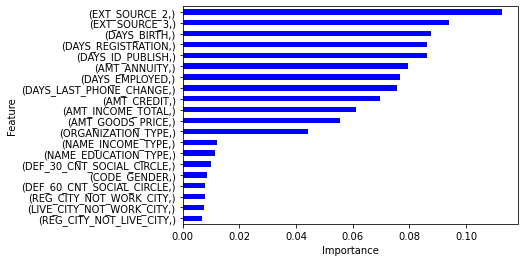

In [57]:
features_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
features_importances.sort_values(ascending=True, inplace=True)
features_importances.plot.barh(color='Blue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Importance Feature")